# Fuel Operations Optimization Analysis

# Understanding Delivery Efficiency and Fuel Consumption

In this project, I aim to analyze fuel delivery data to optimize delivery operations and improve efficiency. The goal is to uncover actionable insights related to fuel consumption, delivery times, and customer feedback,
enabling better decision-making and operational performance.

## Goals and Questions

1. **Delivery Efficiency**:
   - Analyze the distribution of `Delivery_Time_Minutes` across all regions.
   - Identify regions with the longest and shortest delivery times.
   - Evaluate potential outliers in delivery times and suggest improvements.

2. **Fuel Consumption Insights**:
   - Calculate the total and average `Fuel_Consumed_Liters` for each region.
   - Identify regions or vehicles with high fuel consumption to assess inefficiencies.
   - Examine the correlation between `Distance_km` and `Fuel_Consumed_Liters`.

3.  **Customer Feedback Analysis**:
   - Determine average `Customer_Feedback` by region and identify trends.
   - Highlight underperforming regions or areas with low feedback scores.
   - Suggest actionable strategies to improve customer satisfaction.

4. **Monthly Trends Analysis**:
   - Explore monthly trends in delivery performance:
     - Delivery volumes per month.
     - Fuel consumption trends by month.
     - Customer feedback trends by moing.


5. **Optimization Opportunities**:
   - Identify key metrics (e.g., delivery time, fuel efficiency) to measure operational efficiency.
   - Recommend actionable strategies for reducing fuel consumption and optimizing delivery routes.

## Next Steps

1. Perform **Exploratory Data Analysis (EDA)** to answer the above questions.
2. Develop a **predictive model** to forecast fuel consumption and delivery times.
3. Build **interactive dashboards** in Power BI to visualize the insights and recommendations.

## Exploratory Data Analysis

We will start by loading the required libraries. We'll use Pandas to load and analyze the dataset. For visualizing trends and distributions, we will use Matplotlib and Seaborn, which are powerful libraries for creating insightful visualizations. The Numpy library will assist in numerical computations when needed. Finally, Scipy will be used for any advanced statistical calculations if required during the analysis.









In [7]:
# Loading Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Additional library for statistical calculations

from scipy import stats

We can use Pandas' read_csv() method to load the CSV data set into a Pandas Dataframe object.









In [9]:
# modify this to point to the downloaded CSV file
CSV_FILEPATH = "fuel_delivery.csv"
# load the data set
df = pd.read_csv(CSV_FILEPATH)

The shape and the 'head' of a DataFrame and the most basic methods that are almost always used whenever we are working with the Pandas library. The former prints the number of columns and rows in the data as a tuple, while the latter prints out the first n (5 by default) rows of the data set. We can use it to get a feeling about what the data actually looks like.

In [10]:
# (#columns, #rows)
df.shape


(200, 9)

In [11]:
# printing the first five rows
df.head()

,delivery_id,region,fuel_consumed_liters,vehicle_id,customer_feedback,cost_of_fuel,delivery_date,delivery_time,distance_km
0,D0001,East,6.03,V11,3,101.19,01-01-2023 00:00,150,27.31
1,D0002,West,2.60,V6,4,96.35,02-01-2023 00:00,51,8.65
2,D0003,East,7.97,V2,2,91.30,03-01-2023 00:00,29,14.91
3,D0004,West,7.82,V5,3,76.54,04-01-2023 00:00,129,35.75
4,D0005,West,5.55,V7,1,114.33,05-01-2023 00:00,143,8.43


## Univariate Analysis

C:\Users\sanch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


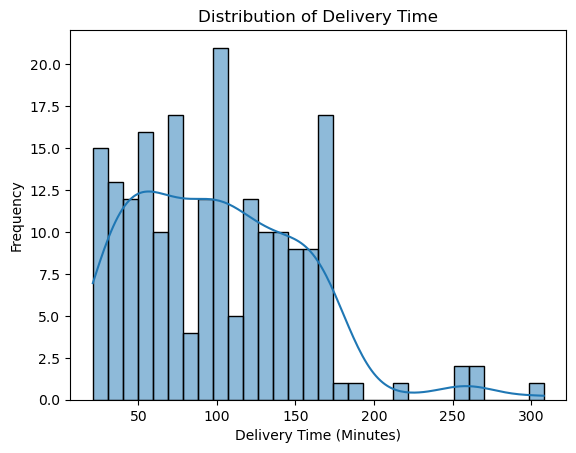

In [12]:
# distribution of delivery_time

sns.histplot(df['delivery_time'], kde=True, bins=30)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.show()


C:\Users\sanch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


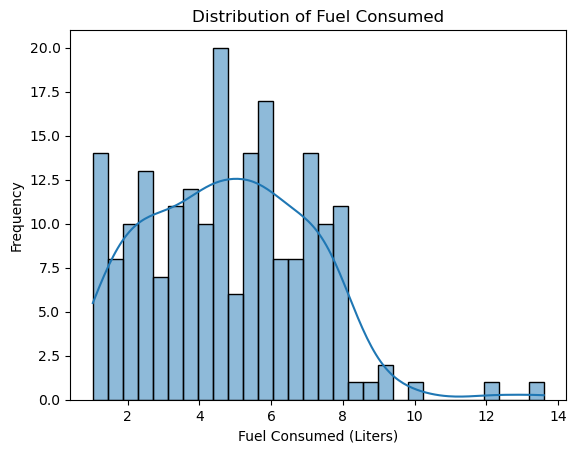

In [13]:
# distribution of fuel_consumed_liters

sns.histplot(df['fuel_consumed_liters'], kde=True, bins=30)
plt.title('Distribution of Fuel Consumed')
plt.xlabel('Fuel Consumed (Liters)')
plt.ylabel('Frequency')
plt.show()


## Exploratory Data Analysis

### 1. Delivery Efficiency

In [14]:
# Identifying regions with the longest and shortest delivery times
# Grouping by Region and calculating the mean delivery time gives insights into regional performance.

region_delivery_time = df.groupby('region')['delivery_time'].mean()
print("Average Delivery Time by Region:")
print(region_delivery_time)


Average Delivery Time by Region:
region
East     104.102041
North     97.864407
South    105.770833
West      93.045455
Name: delivery_time, dtype: float64


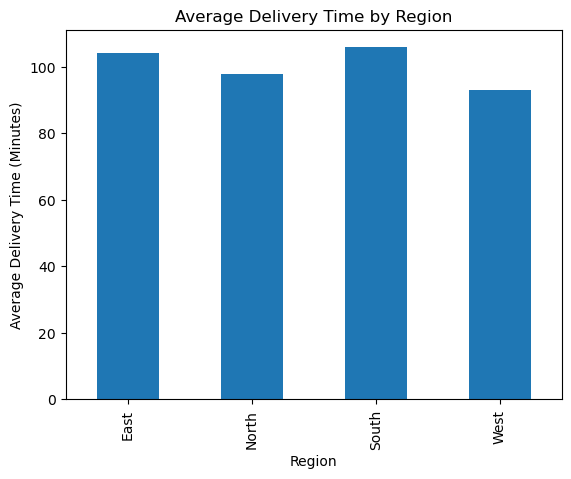

In [15]:
# Visualizing regional differences in delivery times

region_delivery_time.plot(kind='bar', title='Average Delivery Time by Region')
plt.xlabel('Region')
plt.ylabel('Average Delivery Time (Minutes)')
plt.show()

The average delivery times across regions are mostly consistent, indicating a standardized operational process. However, the East and South regions show slightly higher delivery times compared to others, suggesting minor inefficiencies. Further investigation into these regions could optimize performance.









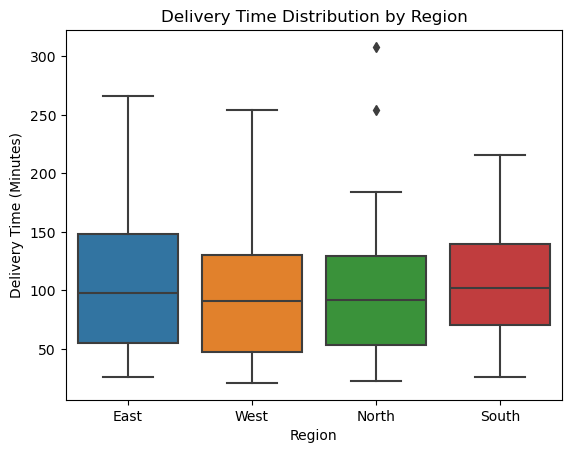

In [17]:
# Evaluating potential outliers in delivery times
# Boxplots help us identify outliers and understand the distribution of delivery times within each region.

sns.boxplot(x='region', y='delivery_time', data=df)
plt.title('Delivery Time Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Delivery Time (Minutes)')
plt.show()

The box plot reveals variability in delivery times across regions. While most regions have a consistent interquartile range, North shows a few high outliers, and East exhibits a broader spread. Addressing these anomalies could improve delivery consistency.









In [20]:
# Descriptive statistics for delivery times
# Calculating median and standard deviation provides a more detailed understanding of delivery performance.

median_delivery_time = df['delivery_time'].median()
std_delivery_time = df['delivery_time'].std()
print(f"Median Delivery Time: {median_delivery_time} minutes")
print(f"Standard Deviation of Delivery Time: {std_delivery_time} minutes")


Median Delivery Time: 98.0 minutes
Standard Deviation of Delivery Time: 53.64518739508017 minutes


### 2. Fuel Consumption Insights



In [21]:
# Total and Average Fuel Consumed by Region
# Calculating total and average fuel consumption per region helps identify areas with high or low efficiency.

region_fuel_stats = df.groupby('region')['fuel_consumed_liters'].agg(['sum', 'mean'])
print("Total and Average Fuel Consumption by Region:")
print(region_fuel_stats)

Total and Average Fuel Consumption by Region:
           sum      mean
region                  
East    238.71  4.871633
North   265.27  4.496102
South   240.87  5.018125
West    215.02  4.886818


The total and average fuel consumption by region analysis shows that the North region has the highest total fuel consumption (265.27 liters), while the West region has the lowest (215.02 liters). However, the average consumption across regions is relatively consistent, indicating uniform vehicle efficiency. Focused improvements in the North region could yield better fuel efficiency.









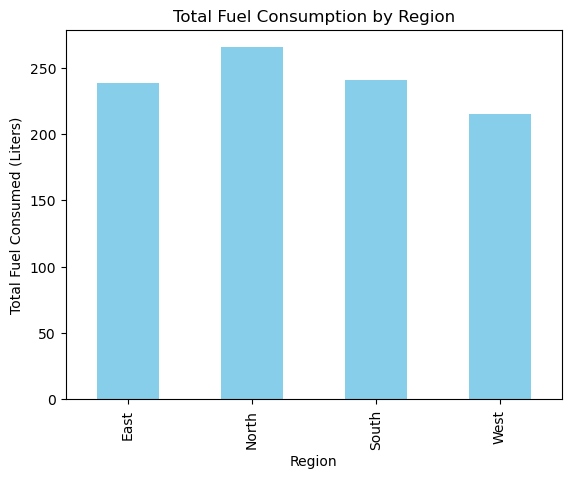

In [22]:
# Bar plot for total fuel consumption by region

region_fuel_stats['sum'].plot(kind='bar', title='Total Fuel Consumption by Region', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Fuel Consumed (Liters)')
plt.show()

The bar chart highlights the total fuel consumption by region. The North region consumes the highest total fuel, while the West consumes the least. This aligns with the earlier statistical summary, reinforcing the need to evaluate North's fuel usage for potential inefficiencies.










In [23]:
# Identifying Vehicles with High Fuel Consumption
# Sorting vehicles by total fuel consumption to identify inefficiencies.

vehicle_fuel_stats = df.groupby('vehicle_id')['fuel_consumed_liters'].sum().sort_values(ascending=False)
print("Vehicles with Highest Fuel Consumption:")
print(vehicle_fuel_stats.head())

Vehicles with Highest Fuel Consumption:
vehicle_id
V4     95.76
V8     91.09
V9     84.29
V2     77.09
V15    74.43
Name: fuel_consumed_liters, dtype: float64


The table lists the vehicles with the highest total fuel consumption. Vehicle V4 consumed the most fuel (95.76 liters), followed by V8 and V9. These vehicles may indicate operational inefficiencies or heavier usage, warranting further investigation to optimize fuel efficiency.









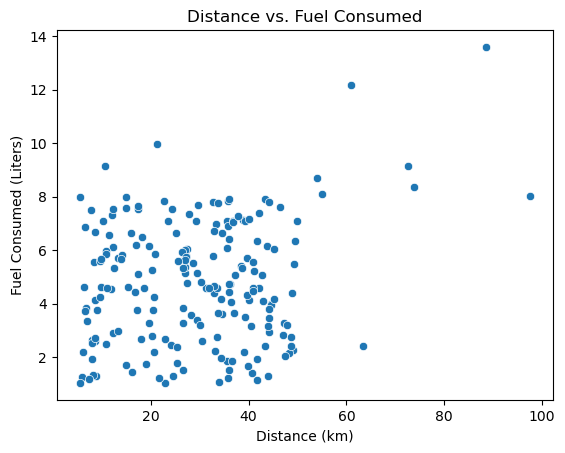

In [24]:
# Correlation Between Distance and Fuel Consumption
# Scatter plot to visualize the relationship between distance traveled and fuel consumed

sns.scatterplot(x='distance_km', y='fuel_consumed_liters', data=df)
plt.title('Distance vs. Fuel Consumed')
plt.xlabel('Distance (km)')
plt.ylabel('Fuel Consumed (Liters)')
plt.show()

The scatter plot illustrates the relationship between distance traveled and fuel consumed. The weak correlation suggests that factors other than distance, such as vehicle efficiency or load, influence fuel consumption. Further investigation into operational inefficiencies could help optimize fuel usage.









In [25]:
# Statistical Analysis: Correlation Coefficient

correlation = df['distance_km'].corr(df['fuel_consumed_liters'])
print(f"Correlation between Distance and Fuel Consumption: {correlation}")


Correlation between Distance and Fuel Consumption: 0.20016970129446157


In [26]:
# Descriptive Statistics for Fuel Consumption
# Summarizing fuel consumption across all records.

mean_fuel = df['fuel_consumed_liters'].mean()
median_fuel = df['fuel_consumed_liters'].median()
std_fuel = df['fuel_consumed_liters'].std()
print(f"Mean Fuel Consumed: {mean_fuel} liters")
print(f"Median Fuel Consumed: {median_fuel} liters")
print(f"Standard Deviation of Fuel Consumed: {std_fuel} liters")


Mean Fuel Consumed: 4.7993500000000004 liters
Median Fuel Consumed: 4.62 liters
Standard Deviation of Fuel Consumed: 2.2583408944349803 liters


### Customer Feedback Analysis 

In [27]:
# Average Customer Feedback by Region
# Grouping by region to identify areas with high and low customer satisfaction.

region_feedback = df.groupby('region')['customer_feedback'].mean()
print("Average Customer Feedback by Region:")
print(region_feedback)

Average Customer Feedback by Region:
region
East     2.551020
North    2.830508
South    3.000000
West     2.636364
Name: customer_feedback, dtype: float64


The average customer feedback by region highlights that the South region has the highest satisfaction score (3.0), while the East has the lowest (2.55). This suggests a potential need for service improvements in the East to enhance customer satisfaction.Let's proceed with visualizing the distribution and identifying actionable strategies for improvement.









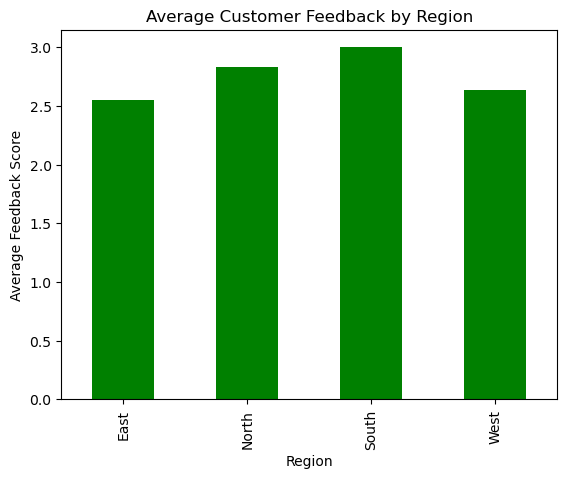

In [28]:
# Bar plot for customer feedback by region

region_feedback.plot(kind='bar', title='Average Customer Feedback by Region', color='green')
plt.xlabel('Region')
plt.ylabel('Average Feedback Score')
plt.show()

C:\Users\sanch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


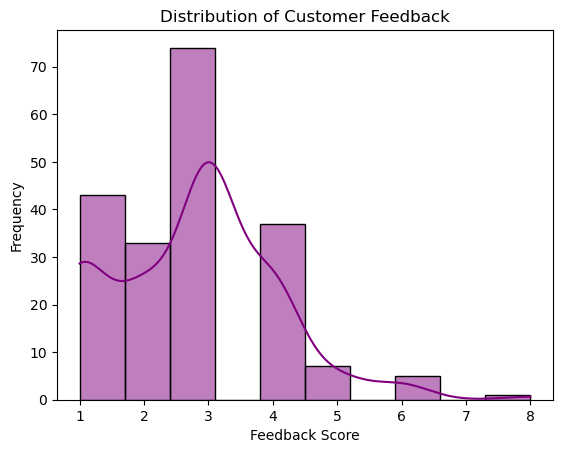

In [29]:
# Distribution of Customer Feedback
# Analyzing the spread of feedback scores to understand overall satisfaction levels.

sns.histplot(df['customer_feedback'], kde=True, bins=10, color='purple')
plt.title('Distribution of Customer Feedback')
plt.xlabel('Feedback Score')
plt.ylabel('Frequency')
plt.show()

The distribution of customer feedback indicates that the majority of feedback scores range between 2 and 3, with a significant drop-off beyond that. The skewed distribution toward lower scores highlights the need for service quality improvements to increase customer satisfaction, especially in regions with below-average feedback.









In [30]:
# Identifying Regions with Low Feedback
# Highlighting regions with below-average feedback scores.

average_feedback = df['customer_feedback'].mean()
low_feedback_regions = region_feedback[region_feedback < average_feedback]
print("Regions with Below-Average Feedback:")
print(low_feedback_regions)


Regions with Below-Average Feedback:
region
East    2.551020
West    2.636364
Name: customer_feedback, dtype: float64


The regions with below-average customer feedback are East (2.55) and West (2.63). This indicates a clear opportunity to enhance service quality and customer experience in these areas. Prioritizing improvements in these regions could significantly boost overall customer satisfaction scores.

In [31]:
# Descriptive Statistics for Feedback
# Providing statistical insights into customer feedback.

mean_feedback = df['customer_feedback'].mean()
median_feedback = df['customer_feedback'].median()
std_feedback = df['customer_feedback'].std()
print(f"Mean Feedback Score: {mean_feedback}")
print(f"Median Feedback Score: {median_feedback}")
print(f"Standard Deviation of Feedback Scores: {std_feedback}")

Mean Feedback Score: 2.76
Median Feedback Score: 3.0
Standard Deviation of Feedback Scores: 1.2847775162772954


### Monthly Trends

In [46]:
#  Converting to datetime format with dayfirst=True

df['delivery_date'] = pd.to_datetime(df['delivery_date'], dayfirst=True)

In [49]:
# Extracting the month from the properly formatted datetime column

df['Month'] = df['delivery_date'].dt.month
print(df[['delivery_date', 'Month']].head())

  delivery_date  Month
0    2023-01-01      1
1    2023-01-02      1
2    2023-01-03      1
3    2023-01-04      1
4    2023-01-05      1


In [50]:
# Analyzing the monthly trend

monthly_trend = df.groupby('Month').size()
print("Number of Deliveries Per Month:")
print(monthly_trend)


Number of Deliveries Per Month:
Month
1    31
2    28
3    31
4    30
5    31
6    30
7    19
dtype: int64


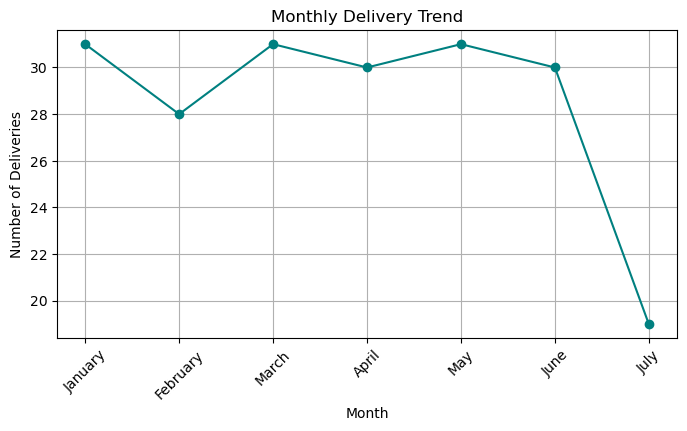

In [52]:
# Visualising the monthly trend

plt.figure(figsize=(8, 4))
monthly_trend.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Delivery Trend')
plt.xlabel('Month')
plt.ylabel('Number of Deliveries')
plt.xticks(ticks=range(1, 8), labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July'], rotation=45)
plt.grid()
plt.show()


This line chart shows the trend of monthly deliveries from January to July. Delivery activity is relatively stable between January and June, with slight fluctuations peaking in March and May. However, a noticeable decline occurs in July, possibly due to seasonal factors, operational challenges, or reduced demand. This trend indicates the need to investigate potential reasons for the sharp drop in July and address operational or marketing strategies to stabilize deliveries throughout the year.









In [55]:
# Calculating Monthly Fuel Consumption
# Group by 'Month' and calculate total fuel consumption

monthly_fuel_consumption = df.groupby('Month')['fuel_consumed_liters'].sum()

In [57]:
# Sorting the index to ensure months are in chronological order
monthly_fuel_consumption = monthly_fuel_consumption.sort_index()
print("Total Fuel Consumption by Month:")
print(monthly_fuel_consumption)


Total Fuel Consumption by Month:
Month
1    160.66
2    136.11
3    139.35
4    143.25
5    171.03
6    132.18
7     77.29
Name: fuel_consumed_liters, dtype: float64


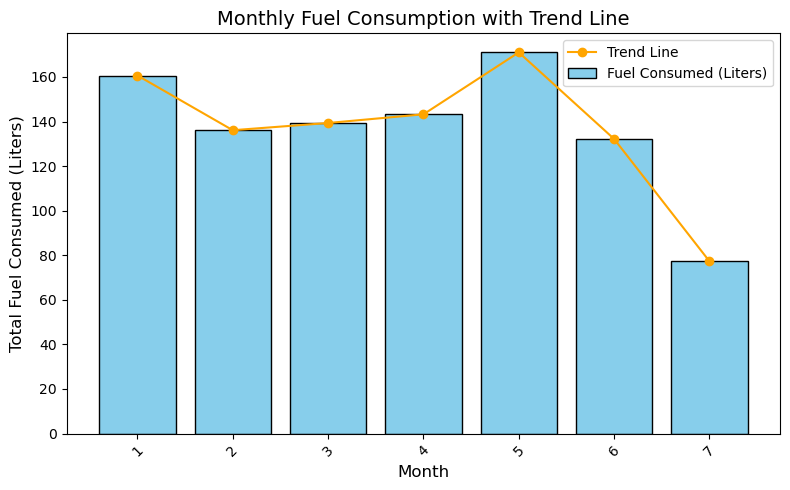

In [59]:
plt.figure(figsize=(8, 5))

# Bar chart
plt.bar(monthly_fuel_consumption.index, monthly_fuel_consumption, color='skyblue', edgecolor='black', label='Fuel Consumed (Liters)')

# Line chart
plt.plot(monthly_fuel_consumption.index, monthly_fuel_consumption, color='orange', marker='o', label='Trend Line')

# Adding titles and labels
plt.title('Monthly Fuel Consumption with Trend Line', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Fuel Consumed (Liters)', fontsize=12)

# Formatting x-axis for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


## Insights and Recommendations

Through this comprehensive analysis of fuel delivery data, several key insights have emerged that can inform future strategies to optimize delivery operations and enhance customer satisfaction:

1. **Delivery Efficiency**:
   - The South region shows the highest average delivery time, suggesting potential inefficiencies in logistics or route optimization.
   - Delivery times in the East region have notable outliers, which could indicate sporadic delays or operational challenges.

2. **Fuel Consumption Insights**:
   - The North region consumes the highest total fuel, while the West region has the least consumption.
   - A weak correlation between distance traveled and fuel consumption suggests inefficiencies in fuel usage, warranting vehicle-specific analysis.

3. **Customer Feedback Analysis**:
   - The South region stands out with the highest customer feedback scores, while the East and West regions fall below average.
   - Consistently high feedback in the South region could be studied to replicate success in other regions.

4. **Monthly Delivery Trends**:
   - Delivery volumes peak in January, March, and May, indicating these months may require increased staffing and inventory.
   - A significant drop in deliveries in July may reflect seasonal trends or external factors.

5. **Operational Optimization Opportunities**:
   - Vehicles V4 and V8 exhibit the highest fuel consumption, highlighting the need for fuel efficiency checks and maintenance.
   - Addressing the weak correlation between distance and fuel consumption can improve overall operational efficiency.
